In [2]:
# Импорт библиотек
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC

 Загрузка и подготовка данных

In [3]:
# Загрузка датасета Iris
iris = sns.load_dataset('iris')
data = iris[['sepal_length', 'petal_length', 'species']]

# Выбор двух видов ирисов для бинарной классификации
data_df = data[(data['species'] == 'virginica') | (data['species'] == 'versicolor')]

# Разделение на признаки и целевую переменную
X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

# Разделение данных по видам для визуализации
data_df_virginica = data_df[data_df['species'] == 'virginica']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

print(f"Размерность данных: {X.shape}")
print(f"Классы: {y.unique()}")
print(f"Количество образцов virginica: {len(data_df_virginica)}")
print(f"Количество образцов versicolor: {len(data_df_versicolor)}")

Размерность данных: (100, 2)
Классы: ['versicolor' 'virginica']
Количество образцов virginica: 50
Количество образцов versicolor: 50


Визуализация исходных данных

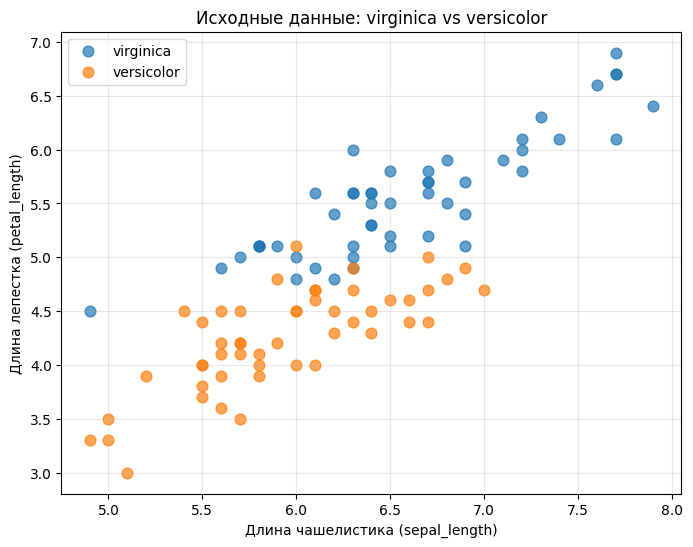

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'], 
           label='virginica', alpha=0.7, s=60)
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'], 
           label='versicolor', alpha=0.7, s=60)
plt.xlabel('Длина чашелистика (sepal_length)')
plt.ylabel('Длина лепестка (petal_length)')
plt.title('Исходные данные: virginica vs versicolor')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Эксперимент с различными значениями параметра C

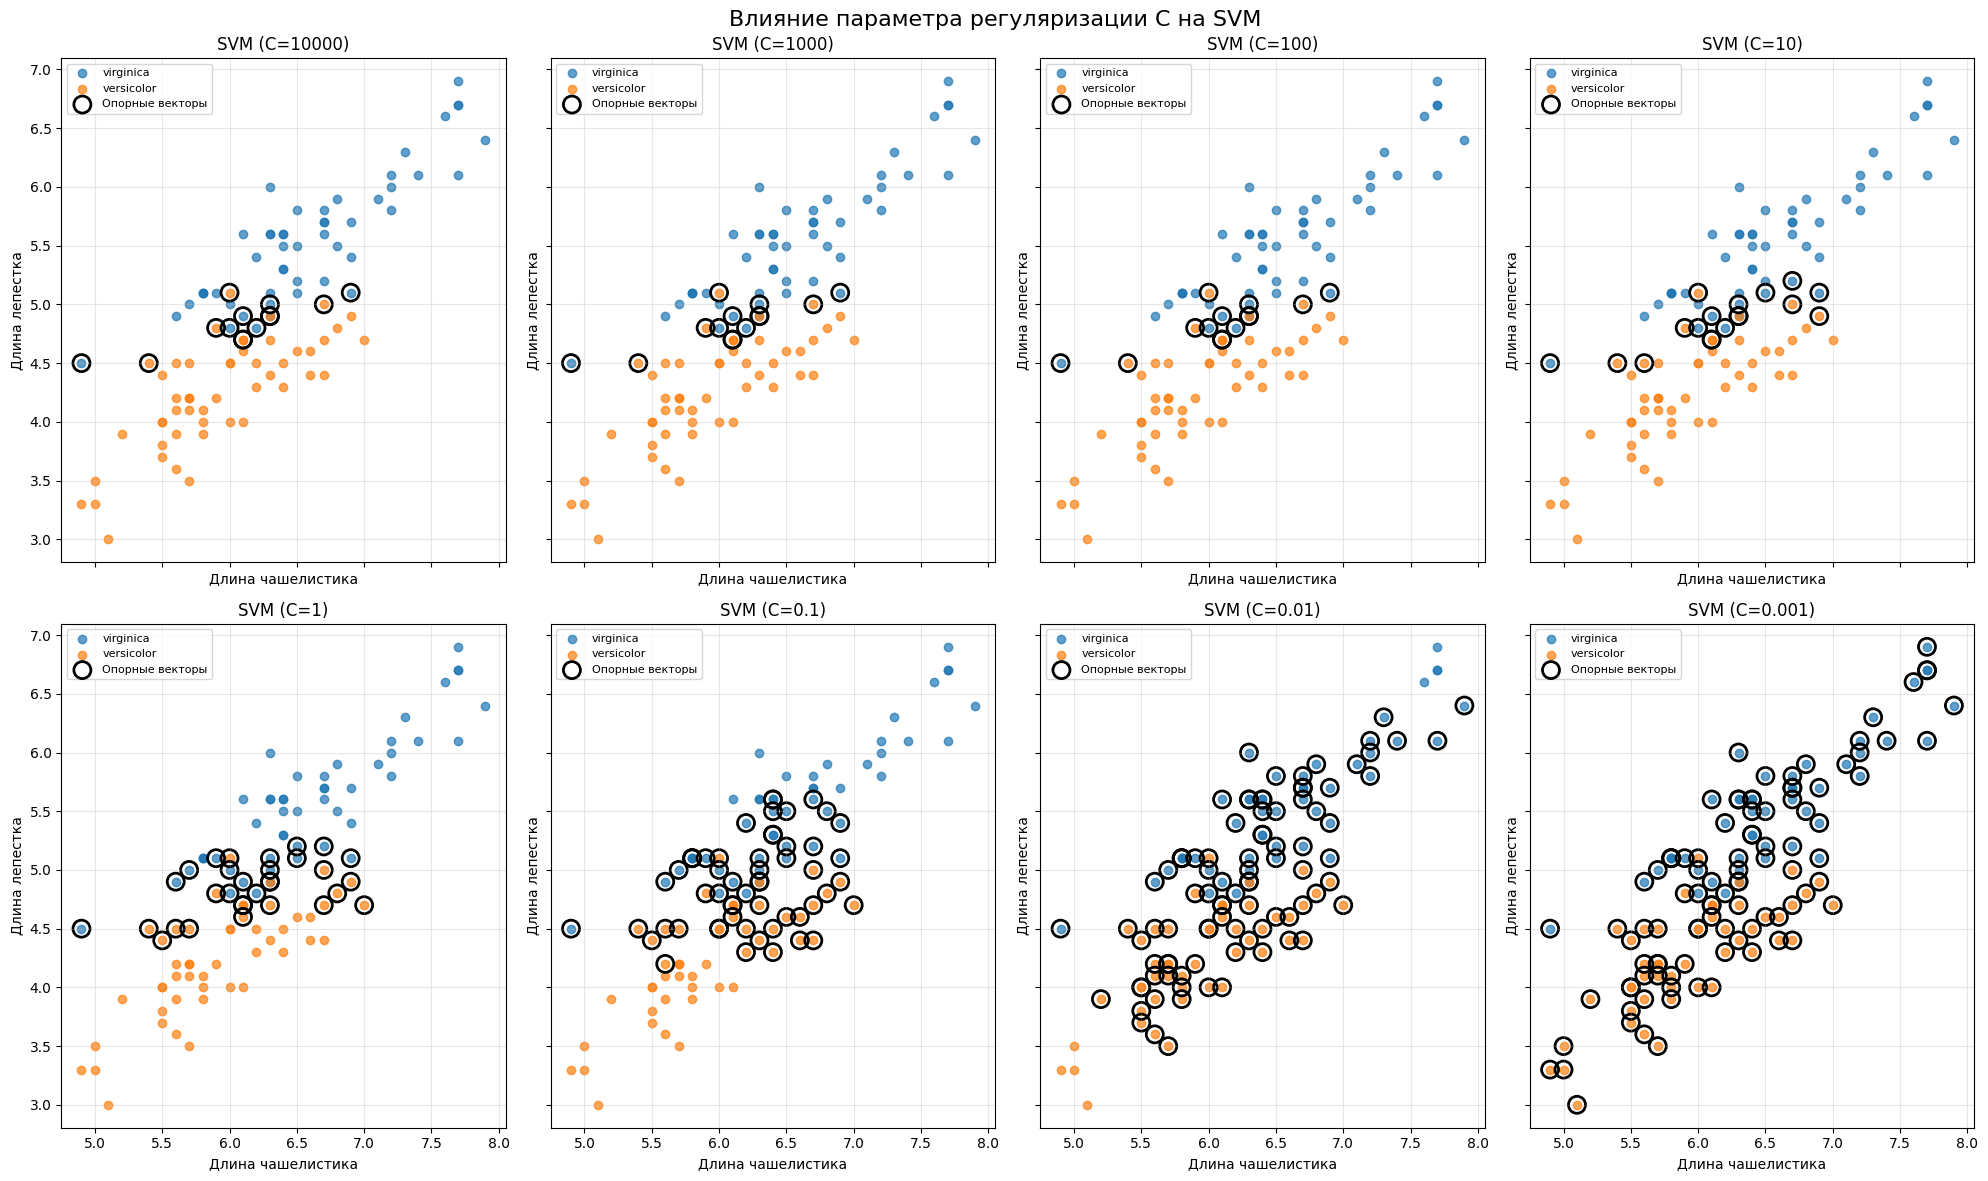

In [ ]:
# Матрица значений параметра C для регуляризации
# C - параметр регуляризации: большие значения = жесткая граница, малые = более мягкая
c_values = [[10000, 1000, 100, 10], 
           [1, 0.1, 0.01, 0.001]]

# Создание сетки графиков
fig, ax = plt.subplots(2, 4, figsize=(20, 12), sharex='col', sharey='row')

# Итерация по всем комбинациям параметра C
for i in range(2):
    for j in range(4):
        # Визуализация исходных данных
        ax[i][j].scatter(data_df_virginica['sepal_length'], 
                        data_df_virginica['petal_length'], 
                        label='virginica', alpha=0.7)
        ax[i][j].scatter(data_df_versicolor['sepal_length'], 
                        data_df_versicolor['petal_length'], 
                        label='versicolor', alpha=0.7)
        
        # Обучение SVM модели с различными значениями C
        model = SVC(kernel='linear', C=c_values[i][j])
        model.fit(X, y)
        
        # Визуализация опорных векторов
        ax[i][j].scatter(model.support_vectors_[:, 0], 
                        model.support_vectors_[:, 1], 
                        s=150, facecolor='none', edgecolor='black', 
                        linewidth=2, label='Опорные векторы')
        
        # Настройка внешнего вида графика
        ax[i][j].set_title(f'SVM (C={c_values[i][j]})')
        ax[i][j].set_xlabel('Длина чашелистика')
        ax[i][j].set_ylabel('Длина лепестка')
        ax[i][j].grid(True, alpha=0.3)
        ax[i][j].legend(fontsize=8)

plt.suptitle('Влияние параметра регуляризации C на SVM', fontsize=16)
plt.tight_layout()
plt.show()

Визуализация областей принятия решений

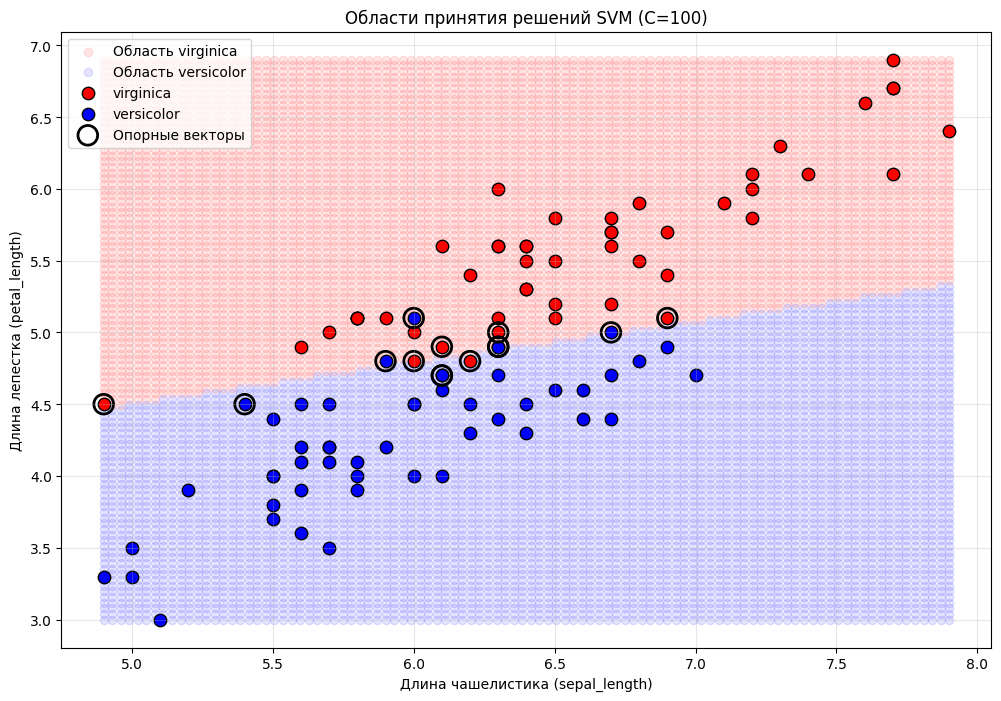

In [8]:
# Создание сетки точек для предсказания
x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)
X1_p, X2_p = np.meshgrid(x1_p, x2_p)

# Подготовка данных для предсказания
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, 
    columns=['sepal_length', 'petal_length'])

# Обучение финальной модели и предсказание
final_model = SVC(kernel='linear', C=100)
final_model.fit(X, y)
y_p = final_model.predict(X_p)
X_p['species'] = y_p

# Разделение предсказаний по классам
X_p_virginica = X_p[X_p['species'] == 'virginica']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

# Визуализация областей принятия решений
plt.figure(figsize=(12, 8))

# Области классификации
plt.scatter(X_p_virginica['sepal_length'], X_p_virginica['petal_length'], 
           alpha=0.1, color='red', label='Область virginica')
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], 
           alpha=0.1, color='blue', label='Область versicolor')

# Исходные данные
plt.scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'], 
           color='red', edgecolor='black', s=80, label='virginica')
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'], 
           color='blue', edgecolor='black', s=80, label='versicolor')

# Опорные векторы
plt.scatter(final_model.support_vectors_[:, 0], final_model.support_vectors_[:, 1], 
           s=200, facecolor='none', edgecolor='black', linewidth=2, 
           label='Опорные векторы')

plt.xlabel('Длина чашелистика (sepal_length)')
plt.ylabel('Длина лепестка (petal_length)')
plt.title('Области принятия решений SVM (C=100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()